# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [1]:
from bs4 import BeautifulSoup
import requests

def grab_song_links(artist_page_url):

    url = artist_page_url

    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing


    #The example from our lecture/reading
    data = [] #Create a storage container

    #Get album divs
    albums = soup.find_all("div", class_="album")
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
    return data

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [34]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!
from bs4 import BeautifulSoup
import requests

#Example page
# url = 'https://www.azlyrics.com/lyrics/lilyallen/sheezus.html'
url = "https://www.azlyrics.com/lyrics/gomez/getmiles.html"
#After Inspecting the page:
#Main DIV
#<div>
# <!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->
# </div>

html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify()[:1000]

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="Lyrics to &quot;Get Miles&quot; song by Gomez: I love this island but this island\'s killing me Sitting here in silence, man, I don\'t get no peace T..." name="description"/>\n  <meta content="Get Miles lyrics, Gomez Get Miles lyrics, Gomez lyrics" name="keywords"/>\n  <meta content="noarchive" name="robots"/>\n  <meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>\n  <title>\n   Gomez - Get Miles Lyrics | AZLyrics.com\n  </title>\n  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>\n  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>\n  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->\n  <!--[if lt IE 9]>\r\n<script src="https://oss.maxcdn.com/html5shi

In [13]:
divs = soup.findAll('div')

In [14]:
div = divs[0]

In [16]:
for n, div in enumerate(divs):
    if "<!-- Usage of azlyrics.com content by any " in div.text:
        print(n)

In [35]:
main_page = soup.find('div', {"class": "container main-page"})
main_l2 = main_page.find('div', {"class" : "row"})
main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})


In [36]:
lyrics = main_l3.findAll('div')[6].text
lyrics

"\n\r\nI love this island but this island's killing me\nSitting here in silence, man, I don't get no peace\nThe waves upon my shore take me away piece by piece\nGonna leave everything I know gonna head out towards the sea\nJump off this island gonna head out towards the sea\n\nI love this city man, but this city's killing me\nSitting here in all this noise man, I don't get no peace\nThe cars below my street take me away piece by piece\nGonna leave everything I know gonna head out towards the sea\nGonna leave this city man, gonna head out towards the sea\n\nGet miles away, get miles away\nGet miles away, get miles\n\nI love this planet but this planet's killin' me\nSitting here in all this grass man I don't get no weed\nThe sweat comin' from my pores take me away piece by piece\nGonna leave everything I know gonna head to the Galaxy\nGonna leave this planet man, gonna head to the Galaxy\n\nGet miles away, get miles away\nGet miles away, get miles away\nGet miles away, get miles away\nGe

In [37]:
def scrape_lyrics(song_page_url):
    html_page = requests.get(song_page_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main_page = soup.find('div', {"class": "container main-page"})
    main_l2 = main_page.find('div', {"class" : "row"})
    main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})
    lyrics = main_l3.findAll('div')[6].text
    return lyrics

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [8]:
#Preview First Step
songs = grab_song_links("https://www.azlyrics.com/g/gomez.html")
print(len(songs))
print(songs[0])

106
('Get Miles', '../lyrics/gomez/getmiles.html', 'album: "Bring It On" (1998)')


In [40]:
songs = grab_song_links("https://www.azlyrics.com/g/gomez.html")
url_base = "https://www.azlyrics.com"
lyrics = []
for song in songs:
    try:
        url_sffx = song[1].replace('..','')
        url = url_base + url_sffx
        lyr = scrape_lyrics(url)
        lyrics.append(lyr)
    except:
        lyrics.append("N/A")

In [42]:
print(len(songs), len(lyrics))

106 106


In [43]:
import pandas as pd

In [44]:
df = pd.DataFrame(list(zip(songs, lyrics)))
df.head()

,0,1
0,"(Get Miles, ../lyrics/gomez/getmiles.html, alb...",\n\r\nI love this island but this island's kil...
1,"(Whippin' Piccadilly, ../lyrics/gomez/whippinp...","\n\r\nOnce upon a time, not too long ago\nWe t..."
2,"(Make No Sound, ../lyrics/gomez/makenosound.ht...","\n\r\nHe's fine, don't make no sound\nHe's fin..."
3,"(78 Stone Wobble, ../lyrics/gomez/78stonewobbl...",\n\r\nI was always told that you have to have ...
4,"(Tijuana Lady, ../lyrics/gomez/tijuanalady.htm...",\n\r\nTake me down\nTo where you hide\nLay me ...


In [50]:
df['Song_Name'] = df[0].map(lambda x: x[0])
df['Song_URL_SFFX'] = df[0].map(lambda x: x[1])
df['Album_Name'] = df[0].map(lambda x: x[2])
df = df.rename(columns={1:'Lyrics'})
df.head()

,0,Lyrics,Song_Name,Song_URL_SFFX,Album_Name
0,"(Get Miles, ../lyrics/gomez/getmiles.html, alb...",\n\r\nI love this island but this island's kil...,Get Miles,../lyrics/gomez/getmiles.html,"album: ""Bring It On"" (1998)"
1,"(Whippin' Piccadilly, ../lyrics/gomez/whippinp...","\n\r\nOnce upon a time, not too long ago\nWe t...",Whippin' Piccadilly,../lyrics/gomez/whippinpiccadilly.html,"album: ""Bring It On"" (1998)"
2,"(Make No Sound, ../lyrics/gomez/makenosound.ht...","\n\r\nHe's fine, don't make no sound\nHe's fin...",Make No Sound,../lyrics/gomez/makenosound.html,"album: ""Bring It On"" (1998)"
3,"(78 Stone Wobble, ../lyrics/gomez/78stonewobbl...",\n\r\nI was always told that you have to have ...,78 Stone Wobble,../lyrics/gomez/78stonewobble.html,"album: ""Bring It On"" (1998)"
4,"(Tijuana Lady, ../lyrics/gomez/tijuanalady.htm...",\n\r\nTake me down\nTo where you hide\nLay me ...,Tijuana Lady,../lyrics/gomez/tijuanalady.html,"album: ""Bring It On"" (1998)"


## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [52]:
pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]

miles    12
this     11
I         9
get       9
away      7
piece     6
the       6
head      6
me        6
Get       6
dtype: int64

Text(0.5,1,"Top 10 Lyrics for Whippin' Piccadilly")

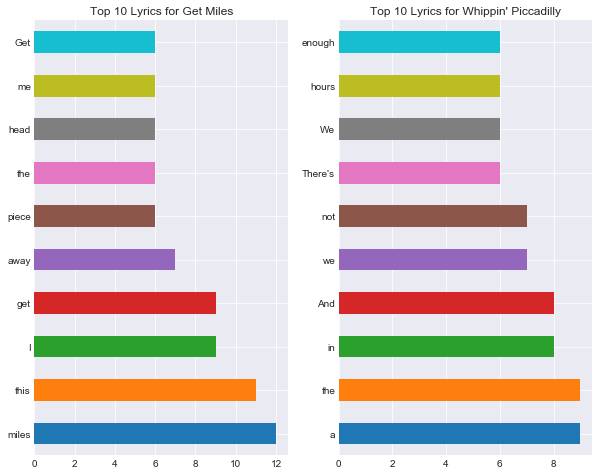

In [57]:
fig, axes = plt.subplots(1,2, figsize=(10,8))
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[0], kind='barh')
#Add Subplot Title
axes[0].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[0]))
#Repeat
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[1].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[1], kind='barh')
#Add Subplot Title
axes[1].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[1]))

## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

### Sample Response: 


Currently the above function scrapes the lyrics verbatim. This costs the most in terms of storage but is the most malleable for future analysis. Alternative views such as a dictionary count of word frequencies would save storage space and makes some analyses quicker (such as plotting word frequencies) but would make other analyses such as a n-gram analysis impossible. In this context, scraping raw transcripts and then producing additional cached views of summaries such as frequency is probably the most sensible as storage size is not likely to be an issue at this scale.

## Summary
Congratulations! You've now practiced your Beautiful Soup knowledge!